In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 100)
# tweets = pd.read_csv('clean_data/tweets.csv')
# btc = pd.read_csv('clean_data/btc.csv')
# doge = pd.read_csv('clean_data/doge.csv')
# eth = pd.read_csv('clean_data/eth.csv')
tesla = pd.read_csv('clean_data/tesla.csv')
tesla['Change'] = tesla['High'].values - tesla['Low'].values


In [291]:
tweets.fillna(0,inplace=True)
tweets.describe().columns

Index(['id', 'conversation_id', 'user_id', 'user_id_str', 'day', 'hour',
       'nlikes', 'nreplies', 'nretweets', 'replies_count', 'retweets_count',
       'likes_count'],
      dtype='object')

In [292]:
# tesla.loc[[(tesla['Date'] >= '2020-04-20')&(tesla['Date'] <= '2020-05-10')],:]
tesla['Date'] = pd.to_datetime(tesla['Date'].values)
tesla.set_index('Date',inplace=True)

In [293]:
tmp = tesla.loc['2020-04-20':'2020-05-10',:].round(2)
tmp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-20,146.54,153.11,142.44,149.27,149.27,73733000
2020-04-21,146.02,150.67,134.76,137.34,137.34,101045500
2020-04-22,140.80,146.80,137.74,146.42,146.42,70827500
2020-04-23,145.52,146.80,140.63,141.13,141.13,66183500
2020-04-24,142.16,146.15,139.64,145.03,145.03,66060000
2020-04-27,147.52,159.90,147.00,159.75,159.75,103407000
2020-04-28,159.13,161.00,151.34,153.82,153.82,76110000
2020-04-29,158.03,160.64,156.63,160.10,160.10,81080000
2020-04-30,171.04,173.96,152.70,156.38,156.38,142359500


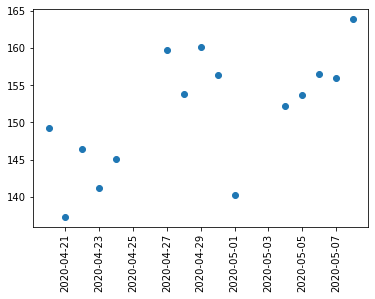

In [294]:
y = tmp['Close'].values
x = tmp.index
plt.scatter(x,y)
plt.xticks(rotation= 90)
plt.show()


In [296]:
tweets['nlikes'] = tweets['nlikes'].astype(int)
trd_likes = tweets['nlikes'].describe().round(2)['75%']
trd_retweet = tweets['nretweets'].describe().round(2)['75%']
good = tweets.loc[(tweets['nlikes'] >= trd_likes) & (tweets['nretweets'] >= trd_retweet),['tweet', 'nlikes','nretweets', 'nreplies']]
good

,tweet,nlikes,nretweets,nreplies
0,Entertainment will be critical when cars drive...,55085,2611.0,2922.0
2,@richierichhhhh_ Absolutely,72434,907.0,495.0
3,What should Tesla do with in-car gaming in an ...,33830,884.0,6932.0
6,Try playing Polytopia in your Tesla! Great gam...,148037,4186.0,5355.0
7,@WSJ Focus on making products &amp; services p...,46407,5085.0,1178.0
...,...,...,...,...
34634,Goal for Model S is to show that electric is w...,33415,1824.0,386.0
34778,Rough cut simulation of the SpaceX next gen ro...,17132,633.0,122.0
34816,"Sew one button, doesn't make u a tailor; cook ...",168062,46325.0,1815.0
34833,Kanye stopped by the SpaceX rocket factory tod...,117055,8414.0,1332.0


In [288]:
# td = tesla.index.values
# gd = good.index.values.astype(str)
good.sort_values('nlikes',ascending=False, inplace=True)
good.loc[good['nlikes'] > good['nlikes'].describe().round(3).values[-2],'tweet'].values

array(['The coronavirus panic is dumb',
       'Had to been done ur welcome  https://t.co/7jT0f9lqIS',
       'Had to been done ur welcome  https://t.co/7jT0f9lqIS', ...,
       'Falcon Heavy engine plumes look like giant laser beams in this photo by rocketphotography  https://t.co/d1RKdPTNj5',
       'Will soon enable Tesla owners to request service from their phone with a few taps. Tesla Ranger will come to you to take care of your car. No need to bring the car in yourself &amp; zero paperwork.',
       'SN8 Starship with flaps &amp; nosecone should be done in about a week. Then static fire, checkouts, static fire, fly to 60,000 ft &amp; back.'],
      dtype=object)

In [284]:
tesla.loc['2019-10-01':'2019-10-16',:].round(2)

,Open,High,Low,Close,Adj Close,Volume
2019-10-01,48.30,49.19,47.83,48.94,48.94,30813000
2019-10-02,48.66,48.93,47.89,48.63,48.63,28157000
2019-10-03,46.37,46.90,44.86,46.61,46.61,75422500
2019-10-04,46.32,46.96,45.61,46.29,46.29,39975000
2019-10-07,45.96,47.71,45.71,47.54,47.54,40321000
2019-10-08,47.17,48.79,46.90,48.01,48.01,43391000
2019-10-09,48.26,49.46,48.13,48.91,48.91,34472000
2019-10-10,49.06,49.86,48.32,48.95,48.95,31416500
2019-10-11,49.43,50.22,49.36,49.58,49.58,42377000
2019-10-14,49.58,51.71,49.43,51.39,51.39,51025000
